# Mask Use Detection

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

from skimage.io import imread, imshow

import data_utils

## Import Data

In [2]:
data_path = "data/Mask_DB/"

Examples for each class:

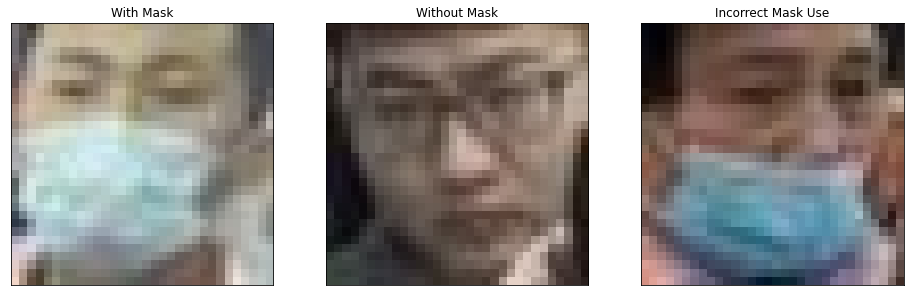

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))

for ax in (ax1, ax2, ax3):
    ax.set_xticks([])
    ax.set_yticks([])

ax1.imshow(imread(os.path.join(data_path, "with_mask/0003.jpg")))
ax1.set_title("With Mask")
ax2.imshow(imread(os.path.join(data_path, "without_mask/0030.jpg")))
ax2.set_title("Without Mask")
ax3.imshow(imread(os.path.join(data_path, "mask_incorrect_use/0062.jpg")))
ax3.set_title("Incorrect Mask Use")
plt.show()

We will create 3 different feature sets in order to find the optimal way to vectorize the images.

In [4]:
rgb_generator = data_utils.read_images(data_path, class_ignore=['mask_incorrect_use'])
data_rgb = data_utils.extract_features(rgb_generator, 'pixels')

gray_generator = data_utils.read_images(data_path, class_ignore=['mask_incorrect_use'], grayscale=1)
data_gray = data_utils.extract_features(gray_generator, 'pixels')

rgb_generator = data_utils.read_images(data_path, class_ignore=['mask_incorrect_use'])
data_hog = data_utils.extract_features(rgb_generator, 'hog')

In [5]:
data_rgb = data_rgb.rename(columns={data_rgb.columns[-1]: "class"})
data_gray = data_gray.rename(columns={data_gray.columns[-1]: "class"})
data_hog = data_hog.rename(columns={data_hog.columns[-1]: "class"})

In [6]:
data_rgb

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,class
0,32,19,11,52,39,31,78,65,57,96,...,41,45,56,28,34,46,30,38,51,0
1,62,42,35,74,54,47,83,60,54,82,...,39,24,19,48,39,34,54,49,45,0
2,26,8,0,50,28,14,110,81,63,154,...,7,4,0,6,5,1,5,4,0,0
3,54,54,62,67,67,75,68,66,77,56,...,53,74,67,78,95,89,102,119,111,0
4,1,4,13,0,0,7,1,1,9,3,...,55,52,61,27,24,35,5,2,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,101,80,49,105,84,53,121,96,66,143,...,161,122,107,163,120,104,146,103,87,1
2084,132,113,73,98,80,40,67,52,11,56,...,95,155,95,72,132,72,70,132,69,1
2085,86,98,60,105,112,78,120,114,88,117,...,80,72,70,89,81,79,96,88,86,1
2086,68,34,22,170,136,124,206,168,157,219,...,236,201,169,206,173,140,160,127,94,1
